In [1]:
%matplotlib notebook
import numpy as np
import scipy.linalg as la
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt

from scipy.spatial import cKDTree

import scipy.sparse as sp
from scipy.sparse.linalg import spsolve, lsqr

from numpy.linalg import cond

# Parameters

In [21]:
n = 1000
stencil_size = 30

def rbf(r):
    return r**5
# 1/r * d/dr phi
def d_phi_dr_div_r(r):
    return 5*r**3

# Generate Points

In [22]:
indices = np.arange(0, n, dtype=float) + 0.5

phi = np.arccos(1 - 2*indices/n)
theta = np.pi * (1 + 5**0.5) * indices

xs, ys, zs = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)
nodes = [(x,y,z) for x,y,z in zip(xs,ys,zs)]

<IPython.core.display.Javascript object>


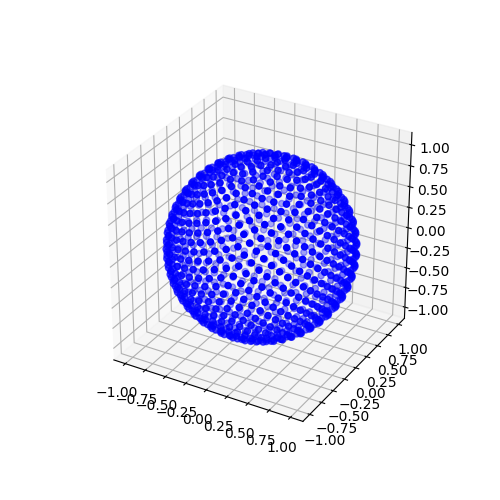

In [23]:
# Plot nodes
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='b')

In [26]:
# Nearest Neighbors 
tree = cKDTree(np.array(nodes))
stencils = [tree.query(node, stencil_size)[1] for node in nodes]

<IPython.core.display.Javascript object>


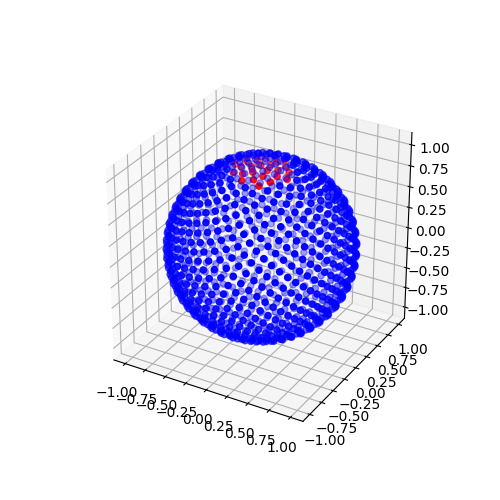

In [34]:
# Plot stencil
center_index = 0
stencil_x = [nodes[i][0] for i in stencils[center_index]]
stencil_y = [nodes[i][1] for i in stencils[center_index]]
stencil_z = [nodes[i][2] for i in stencils[center_index]]

not_stencil_x = [nodes[i][0] for i in range(n) if i not in stencils[center_index]]
not_stencil_y = [nodes[i][1] for i in range(n) if i not in stencils[center_index]]
not_stencil_z = [nodes[i][2] for i in range(n) if i not in stencils[center_index]]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stencil_x, stencil_y, stencil_z, c='r')
ax.scatter(not_stencil_x, not_stencil_y, not_stencil_z, c='b')

# Approximate Surface Gradient

In [35]:
def dist(node1, node2):
    return np.sqrt( (node1[0]-node2[0])**2 + (node1[1]-node2[1])**2 + (node1[2]-node2[2])**2 )

def P_grad_rbf_x(node1, node2):
    r = dist(node1, node2)
    return d_phi_dr_div_r(r) * (1-r**2) * (node1[0] - node2[0])
def P_grad_rbf_y(node1, node2):
    r = dist(node1, node2)
    return d_phi_dr_div_r(r) * (1-r**2) * (node1[1] - node2[1])
def P_grad_rbf_z(node1, node2):
    r = dist(node1, node2)
    return d_phi_dr_div_r(r) * (1-r**2) * (node1[2] - node2[2])